In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, string
import tweepy as tw
import pickle
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Twitter Credentials 

Access_token        = "1256146726404030464-3Ea7Jagyqpe220R01lykX0QZ2oCDnJ"

Access_token_secret = "oUjUAis8hGxeP2BgG1qedS0GZEcmyl5EPgPtX2og0HE5F"

Consumer_key        = "H0ScGhnQ3Q1zIQBOfw3ALnAHa"

Consumer_secret_key = "uRXmKQ57LeDwLJDKvjv9sm9Sdwu4hGys1EjyWBWqNwLBzB0PdK"

In [3]:

# Get all tweets

def all_tweets(username):
    
    auth = tw.OAuthHandler(Consumer_key, Consumer_secret_key)
    auth.set_access_token(Access_token, Access_token_secret)
    api = tw.API(auth, wait_on_rate_limit = True)
    
    tweets = []
    
    new_tweets = api.user_timeline(screen_name = username, count = 3200, tweet_mode="extended")
    tweets.extend(new_tweets)
    
    oldest = tweets[-1].id-1
    
    while len(new_tweets)>0:
        new_tweets = api.user_timeline(screen_name = username, count = 3200, max_id = oldest, tweet_mode="extended")
        tweets.extend(new_tweets)
        oldest = tweets[-1].id-1
        
        
    return tweets



In [4]:
politician_tweets = {}

u_name = ['RahulGandhi', 'JoeBiden', 'BillClinton', 'BarackObama', 'realDonaldTrump', 'narendramodi']

for i in u_name:
    
    politician_tweets[i] = [[tweet.created_at, tweet.full_text] for tweet in all_tweets(i)]

In [5]:
pickle.dump(politician_tweets, open("politician_tweets.pkl", "wb"))

In [6]:
pd.set_option('Max_colwidth', 200)

df_tweets = pd.DataFrame.from_dict(politician_tweets.values()).transpose()

df_tweets.columns = ['RahulGandhi', 'JoeBiden', 'BillClinton', 'BarackObama', 'DonaldTrump', 'NarendraModi']

df_tweets.head()

,RahulGandhi,JoeBiden,BillClinton,BarackObama,DonaldTrump,NarendraModi
0,"[2020-06-10 03:39:04, The Chinese have walked in and taken our territory in Ladakh.\n\nMeanwhile\n\nThe PM is absolutely silent and has vanished from the scene.\n\nhttps://t.co/Cv06T6aMvU]","[2020-06-11 01:15:00, There is systemic racism not just in our law enforcement but also in housing, education, and everything we do — and we have to do the hard work to end it. https://t.co/w9H77J...","[2020-05-31 00:01:39, No one deserves to die the way George Floyd did. And the truth is, if you’re white in America, the chances are you won’t. That truth is what underlies the pain and the anger ...","[2020-06-10 15:10:15, It’s too early to tell if it’s permanent, but the changes brought on by COVID-19 are forcing many of us to reflect on what really matters in our lives. https://t.co/9qlOdWKAuO]","[2020-06-11 03:38:11, Domestic Terrorists have taken over Seattle, run by Radical Left Democrats, of course. LAW &amp; ORDER!]","[2020-06-11 05:40:35, Addressing the Indian Chamber of Commerce. Watch. https://t.co/5vc5Vtg7E2]"
1,"[2020-06-09 07:46:56, For the millions of my sisters and brothers like Ajay, we share your pain. We will do everything to protect you. \n\nWe will overcome this together. \n\n#SpeakUpDelhi https:/...","[2020-06-11 00:15:00, We have to make this an era of action — starting with real police reform. No more excuses. No more delays.\n \nAdd your name to demand Congress ban chokeholds — and pass real...","[2020-05-25 16:53:18, Today, and every day, we remember the brave men and women who sacrificed so much for their fellow Americans. Your country is forever grateful. 🇺🇸]","[2020-06-09 23:30:04, RT @JoeBiden: Grief is a heavy burden to bear — and it's even harder with the eyes of the world watching. I know. But that burden is now a…]","[2020-06-11 03:30:48, RT @MarshaBlackburn: Decades of failed engagement, Western investment and unfair trade tactics built China into an industrial behemoth, giv…]","[2020-06-10 15:28:17, Had an excellent conversation with my friend PM @netanyahu about how India-Israel can collaborate in the post-COVID world. Also congratulated him for assuming the Prime Minis..."
2,"[2020-06-09 02:54:14, Once RM is done commenting on the hand symbol, can he answer: \n\nHave the Chinese occupied Indian territory in Ladakh?]","[2020-06-10 23:30:00, This pandemic isn't just going to go away because you want it to, Mr. President. Step up and do your job before your negligence costs even more lives than it already has. htt...","[2020-05-24 20:06:36, I'll always remember Eddie Sutton as a good man, who cared about his players, got the best out of them and prepared them well for life after basketball. And I will always lov...","[2020-06-09 21:56:52, RT @DemRedistrict: Georgians are risking their health to cast a vote, only to be met with absurdly long lines, broken voting machines, and…]","[2020-06-11 03:27:22, “Very troubled by Durham probe findings.” A.G. Bill Barr @BretBaier @FoxNews]","[2020-06-10 13:59:26, Discussed the COVID-19 pandemic with Prime Minister Hun Sen. India shares deep cultural and historical links with Cambodia - an important partner in our extended neighbourhoo..."
3,"[2020-06-08 17:15:34, My condolences to the family and friends of Ajay Pandita, who sacrificed his life for the democratic process in Kashmir. We stand with you in this time of grief. \n\nViolence...","[2020-06-10 21:45:00, Ignore the polls. We can't take anything for granted this November — the stakes are simply too high.\n \nRegister to vote: https://t.co/Hy8C4mIL2M\n \nDonate: https://t.co/Bp...","[2020-05-23 00:40:42, RT @SecDef19: Losing Open Skies is a major blow to international arms control efforts. One more critical line of communication with Russia…]","[2020-06-07 23:25:01, As has always been true at key moments in history, it’s going to depend on young people to go out there and rewrite what is possible.\n\nI couldn’t be prouder of all the youn...",

In [7]:
df_tweets.to_pickle("raw_tweets.pkl")

In [8]:
df_tweets = pd.read_pickle("raw_tweets.pkl")

In [9]:
df_tweets.head()

,RahulGandhi,JoeBiden,BillClinton,BarackObama,DonaldTrump,NarendraModi
0,"[2020-06-10 03:39:04, The Chinese have walked in and taken our territory in Ladakh.\n\nMeanwhile\n\nThe PM is absolutely silent and has vanished from the scene.\n\nhttps://t.co/Cv06T6aMvU]","[2020-06-11 01:15:00, There is systemic racism not just in our law enforcement but also in housing, education, and everything we do — and we have to do the hard work to end it. https://t.co/w9H77J...","[2020-05-31 00:01:39, No one deserves to die the way George Floyd did. And the truth is, if you’re white in America, the chances are you won’t. That truth is what underlies the pain and the anger ...","[2020-06-10 15:10:15, It’s too early to tell if it’s permanent, but the changes brought on by COVID-19 are forcing many of us to reflect on what really matters in our lives. https://t.co/9qlOdWKAuO]","[2020-06-11 03:38:11, Domestic Terrorists have taken over Seattle, run by Radical Left Democrats, of course. LAW &amp; ORDER!]","[2020-06-11 05:40:35, Addressing the Indian Chamber of Commerce. Watch. https://t.co/5vc5Vtg7E2]"
1,"[2020-06-09 07:46:56, For the millions of my sisters and brothers like Ajay, we share your pain. We will do everything to protect you. \n\nWe will overcome this together. \n\n#SpeakUpDelhi https:/...","[2020-06-11 00:15:00, We have to make this an era of action — starting with real police reform. No more excuses. No more delays.\n \nAdd your name to demand Congress ban chokeholds — and pass real...","[2020-05-25 16:53:18, Today, and every day, we remember the brave men and women who sacrificed so much for their fellow Americans. Your country is forever grateful. 🇺🇸]","[2020-06-09 23:30:04, RT @JoeBiden: Grief is a heavy burden to bear — and it's even harder with the eyes of the world watching. I know. But that burden is now a…]","[2020-06-11 03:30:48, RT @MarshaBlackburn: Decades of failed engagement, Western investment and unfair trade tactics built China into an industrial behemoth, giv…]","[2020-06-10 15:28:17, Had an excellent conversation with my friend PM @netanyahu about how India-Israel can collaborate in the post-COVID world. Also congratulated him for assuming the Prime Minis..."
2,"[2020-06-09 02:54:14, Once RM is done commenting on the hand symbol, can he answer: \n\nHave the Chinese occupied Indian territory in Ladakh?]","[2020-06-10 23:30:00, This pandemic isn't just going to go away because you want it to, Mr. President. Step up and do your job before your negligence costs even more lives than it already has. htt...","[2020-05-24 20:06:36, I'll always remember Eddie Sutton as a good man, who cared about his players, got the best out of them and prepared them well for life after basketball. And I will always lov...","[2020-06-09 21:56:52, RT @DemRedistrict: Georgians are risking their health to cast a vote, only to be met with absurdly long lines, broken voting machines, and…]","[2020-06-11 03:27:22, “Very troubled by Durham probe findings.” A.G. Bill Barr @BretBaier @FoxNews]","[2020-06-10 13:59:26, Discussed the COVID-19 pandemic with Prime Minister Hun Sen. India shares deep cultural and historical links with Cambodia - an important partner in our extended neighbourhoo..."
3,"[2020-06-08 17:15:34, My condolences to the family and friends of Ajay Pandita, who sacrificed his life for the democratic process in Kashmir. We stand with you in this time of grief. \n\nViolence...","[2020-06-10 21:45:00, Ignore the polls. We can't take anything for granted this November — the stakes are simply too high.\n \nRegister to vote: https://t.co/Hy8C4mIL2M\n \nDonate: https://t.co/Bp...","[2020-05-23 00:40:42, RT @SecDef19: Losing Open Skies is a major blow to international arms control efforts. One more critical line of communication with Russia…]","[2020-06-07 23:25:01, As has always been true at key moments in history, it’s going to depend on young people to go out there and rewrite what is possible.\n\nI couldn’t be prouder of all the youn...",

In [10]:
working_df = df_tweets.copy()

working_df.head(2)



,RahulGandhi,JoeBiden,BillClinton,BarackObama,DonaldTrump,NarendraModi
0,"[2020-06-10 03:39:04, The Chinese have walked in and taken our territory in Ladakh.\n\nMeanwhile\n\nThe PM is absolutely silent and has vanished from the scene.\n\nhttps://t.co/Cv06T6aMvU]","[2020-06-11 01:15:00, There is systemic racism not just in our law enforcement but also in housing, education, and everything we do — and we have to do the hard work to end it. https://t.co/w9H77J...","[2020-05-31 00:01:39, No one deserves to die the way George Floyd did. And the truth is, if you’re white in America, the chances are you won’t. That truth is what underlies the pain and the anger ...","[2020-06-10 15:10:15, It’s too early to tell if it’s permanent, but the changes brought on by COVID-19 are forcing many of us to reflect on what really matters in our lives. https://t.co/9qlOdWKAuO]","[2020-06-11 03:38:11, Domestic Terrorists have taken over Seattle, run by Radical Left Democrats, of course. LAW &amp; ORDER!]","[2020-06-11 05:40:35, Addressing the Indian Chamber of Commerce. Watch. https://t.co/5vc5Vtg7E2]"
1,"[2020-06-09 07:46:56, For the millions of my sisters and brothers like Ajay, we share your pain. We will do everything to protect you. \n\nWe will overcome this together. \n\n#SpeakUpDelhi https:/...","[2020-06-11 00:15:00, We have to make this an era of action — starting with real police reform. No more excuses. No more delays.\n \nAdd your name to demand Congress ban chokeholds — and pass real...","[2020-05-25 16:53:18, Today, and every day, we remember the brave men and women who sacrificed so much for their fellow Americans. Your country is forever grateful. 🇺🇸]","[2020-06-09 23:30:04, RT @JoeBiden: Grief is a heavy burden to bear — and it's even harder with the eyes of the world watching. I know. But that burden is now a…]","[2020-06-11 03:30:48, RT @MarshaBlackburn: Decades of failed engagement, Western investment and unfair trade tactics built China into an industrial behemoth, giv…]","[2020-06-10 15:28:17, Had an excellent conversation with my friend PM @netanyahu about how India-Israel can collaborate in the post-COVID world. Also congratulated him for assuming the Prime Minis..."


In [11]:
working_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3247 entries, 0 to 3246
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   RahulGandhi   3234 non-null   object
 1   JoeBiden      3247 non-null   object
 2   BillClinton   1004 non-null   object
 3   BarackObama   3208 non-null   object
 4   DonaldTrump   3206 non-null   object
 5   NarendraModi  3215 non-null   object
dtypes: object(6)
memory usage: 152.3+ KB


In [12]:
working_df.isnull().any()

RahulGandhi      True
JoeBiden        False
BillClinton      True
BarackObama      True
DonaldTrump      True
NarendraModi     True
dtype: bool

## Data Cleaning

In [13]:
working_df.head(2)

,RahulGandhi,JoeBiden,BillClinton,BarackObama,DonaldTrump,NarendraModi
0,"[2020-06-10 03:39:04, The Chinese have walked in and taken our territory in Ladakh.\n\nMeanwhile\n\nThe PM is absolutely silent and has vanished from the scene.\n\nhttps://t.co/Cv06T6aMvU]","[2020-06-11 01:15:00, There is systemic racism not just in our law enforcement but also in housing, education, and everything we do — and we have to do the hard work to end it. https://t.co/w9H77J...","[2020-05-31 00:01:39, No one deserves to die the way George Floyd did. And the truth is, if you’re white in America, the chances are you won’t. That truth is what underlies the pain and the anger ...","[2020-06-10 15:10:15, It’s too early to tell if it’s permanent, but the changes brought on by COVID-19 are forcing many of us to reflect on what really matters in our lives. https://t.co/9qlOdWKAuO]","[2020-06-11 03:38:11, Domestic Terrorists have taken over Seattle, run by Radical Left Democrats, of course. LAW &amp; ORDER!]","[2020-06-11 05:40:35, Addressing the Indian Chamber of Commerce. Watch. https://t.co/5vc5Vtg7E2]"
1,"[2020-06-09 07:46:56, For the millions of my sisters and brothers like Ajay, we share your pain. We will do everything to protect you. \n\nWe will overcome this together. \n\n#SpeakUpDelhi https:/...","[2020-06-11 00:15:00, We have to make this an era of action — starting with real police reform. No more excuses. No more delays.\n \nAdd your name to demand Congress ban chokeholds — and pass real...","[2020-05-25 16:53:18, Today, and every day, we remember the brave men and women who sacrificed so much for their fellow Americans. Your country is forever grateful. 🇺🇸]","[2020-06-09 23:30:04, RT @JoeBiden: Grief is a heavy burden to bear — and it's even harder with the eyes of the world watching. I know. But that burden is now a…]","[2020-06-11 03:30:48, RT @MarshaBlackburn: Decades of failed engagement, Western investment and unfair trade tactics built China into an industrial behemoth, giv…]","[2020-06-10 15:28:17, Had an excellent conversation with my friend PM @netanyahu about how India-Israel can collaborate in the post-COVID world. Also congratulated him for assuming the Prime Minis..."


In [14]:
pd.set_option('max_colwidth', 150)


consolidated_df = pd.concat([pd.DataFrame([''.join(str(i[-1]) for i in working_df[working_df['RahulGandhi'].notnull()].loc[0:,'RahulGandhi'])]),
                             pd.DataFrame([''.join(str(i[-1]) for i in working_df[working_df['JoeBiden'].notnull()].loc[0:,'JoeBiden'])]),
                             pd.DataFrame([''.join(str(i[-1]) for i in working_df[working_df['BillClinton'].notnull()].loc[0:,'BillClinton'])]),
                             pd.DataFrame([''.join(str(i[-1]) for i in working_df[working_df['BarackObama'].notnull()].loc[0:,'BarackObama'])]),
                             pd.DataFrame([''.join(str(i[-1]) for i in working_df[working_df['DonaldTrump'].notnull()].loc[0:,'DonaldTrump'])]),
                             pd.DataFrame([''.join(str(i[-1]) for i in working_df[working_df['NarendraModi'].notnull()].loc[0:,'NarendraModi'])])], axis = 1)

consolidated_df.columns = ['RahulGandhi', 'JoeBiden', 'BillClinton', 'BarackObama', 'DonaldTrump', 'NarendraModi']

consolidated_df = consolidated_df.transpose()

consolidated_df = consolidated_df.reset_index()

consolidated_df.columns = ['Name', 'Tweets']

consolidated_df

,Name,Tweets
0,RahulGandhi,The Chinese have walked in and taken our territory in Ladakh.\n\nMeanwhile\n\nThe PM is absolutely silent and has vanished from the scene.\n\nhttp...
1,JoeBiden,"There is systemic racism not just in our law enforcement but also in housing, education, and everything we do — and we have to do the hard work to..."
2,BillClinton,"No one deserves to die the way George Floyd did. And the truth is, if you’re white in America, the chances are you won’t. That truth is what under..."
3,BarackObama,"It’s too early to tell if it’s permanent, but the changes brought on by COVID-19 are forcing many of us to reflect on what really matters in our l..."
4,DonaldTrump,"Domestic Terrorists have taken over Seattle, run by Radical Left Democrats, of course. LAW &amp; ORDER!RT @MarshaBlackburn: Decades of failed enga..."
5,NarendraModi,Addressing the Indian Chamber of Commerce. Watch. https://t.co/5vc5Vtg7E2Had an excellent conversation with my friend PM @netanyahu about how Indi...


In [15]:
# Data Cleanng : Round 1

import re
import string
import preprocessor as p
p.set_options(p.OPT.URL, p.OPT.EMOJI)

consolidated_df['Tweets'] = consolidated_df['Tweets'].apply(lambda x: p.clean(str(x)))
consolidated_df['Tweets'] = consolidated_df['Tweets'].replace("\\n\\n", '', regex = True)
consolidated_df['Tweets'] = consolidated_df['Tweets'].apply(lambda x: ''.join([w.lower() for w in x if w not in string.punctuation]))
consolidated_df['Tweets'] = consolidated_df['Tweets'].replace("today|time|just|need|right|come|thank|people|amp|obama|president|india|indian|thank|must|great|govt|like|many|know|make|every|year|clintonfdn|realdonaldtrump|would|done|also|take|even|never|thats|join|america|american|rahul gandhi|donald trump", '', regex = True)


In [16]:
consolidated_df

,Name,Tweets
0,RahulGandhi,the chinese have walked in and n our territory in ladakh meanwhile the pm is absolutely silent and has vanished from the scene the millions of my ...
1,JoeBiden,there is systemic racism not in our law enforcement but in housing education and thing we do and we have to do the hard work to end it have to ...
2,BillClinton,no one deserves to die the way george floyd did and the truth is if youre white in the chances are you wont that truth is what underlies the pain...
3,BarackObama,its too early to tell if its permanent but the changes brought on by covid19 are forcing of us to reflect on what really matters in our lives joe...
4,DonaldTrump,domestic terrorists have n over seattle run by radical left democrats of course law orderrt marshablackburn decades of failed engagement western ...
5,NarendraModi,addressing the n chamber of commerce watch an excellent conversation with my friend pm netanyahu about how israel can collaborate in the postcovid...


In [17]:
# Round 2

import time
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer, word_tokenize

lemma = WordNetLemmatizer()
tweet_tokenizer = TweetTokenizer()

start = time.time()

def clean_text_round2(text):
    
    text = tweet_tokenizer.tokenize(text)
    text = [w for w in text if w.isalpha()]
    text = [w for w in text if w not in stopwords.words('english')]
    text = [w for w in text if len(w) > 2]
    text = [lemma.lemmatize(w) for w in text]
    
    return text
    
    
#consolidated_df['Tokenized_tweets'] = consolidated_df['Tweets'].apply(lambda x: tweet_tokenizer.tokenize(x))
#consolidated_df['Tokenized_tweets'] = consolidated_df['Tokenized_tweets'].apply(lambda x: [w for w in x if w not in stopwords.words('english')])
#consolidated_df['Tokenized_tweets'] = consolidated_df['Tokenized_tweets'].apply(lambda x: [w for w in x if len(w) > 2])
#consolidated_df['Tokenized_tweets'] = consolidated_df['Tokenized_tweets'].apply(lambda x: [lemma.lemmatize(w) for w in x])


consolidated_df['Tokenized_tweets'] = consolidated_df['Tweets'].apply(lambda x: clean_text_round2(x))

print('Seconds elapsed: {}'.format(time.time() - start))

Seconds elapsed: 504.17930126190186


In [18]:
consolidated_df

,Name,Tweets,Tokenized_tweets
0,RahulGandhi,the chinese have walked in and n our territory in ladakh meanwhile the pm is absolutely silent and has vanished from the scene the millions of my ...,"[chinese, walked, territory, ladakh, meanwhile, absolutely, silent, vanished, scene, million, sister, brother, ajay, share, pain, thing, protect, ..."
1,JoeBiden,there is systemic racism not in our law enforcement but in housing education and thing we do and we have to do the hard work to end it have to ...,"[systemic, racism, law, enforcement, housing, education, thing, hard, work, end, era, action, starting, real, police, reform, excuse, delay, add, ..."
2,BillClinton,no one deserves to die the way george floyd did and the truth is if youre white in the chances are you wont that truth is what underlies the pain...,"[one, deserves, die, way, george, floyd, truth, youre, white, chance, wont, truth, underlies, pain, anger, feeling, expressing, full, statement, d..."
3,BarackObama,its too early to tell if its permanent but the changes brought on by covid19 are forcing of us to reflect on what really matters in our lives joe...,"[early, tell, permanent, change, brought, covid, forcing, reflect, really, matter, life, joebiden, grief, heavy, burden, bear, harder, eye, world,..."
4,DonaldTrump,domestic terrorists have n over seattle run by radical left democrats of course law orderrt marshablackburn decades of failed engagement western ...,"[domestic, terrorist, seattle, run, radical, left, democrat, course, law, orderrt, marshablackburn, decade, failed, engagement, western, investmen..."
5,NarendraModi,addressing the n chamber of commerce watch an excellent conversation with my friend pm netanyahu about how israel can collaborate in the postcovid...,"[addressing, chamber, commerce, watch, excellent, conversation, friend, netanyahu, israel, collaborate, postcovid, world, congratulated, assuming,..."


In [19]:
consolidated_df.to_pickle("consolidated_df.pkl")

In [20]:
consolidated_df = pd.read_pickle("consolidated_df.pkl")

### Unigram Tfidf Vectorize

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

start = time.time()

tfidf = TfidfVectorizer(analyzer = clean_text_round2)

tfidf_transfomed = tfidf.fit_transform(consolidated_df['Tweets'])

data_df = pd.DataFrame(tfidf_transfomed.toarray(), columns = tfidf.get_feature_names())

print('Seconds elapsed: {}'.format(time.time() - start))

Seconds elapsed: 481.1035304069519


### Bigram Tfidf Vectorize

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

start = time.time()

tfidf = TfidfVectorizer(ngram_range = (2,2), stop_words = stopwords.words('english'))

tfidf_transfomed = tfidf.fit_transform(consolidated_df['Tweets'])

data_df_bigram = pd.DataFrame(tfidf_transfomed.toarray(), columns = tfidf.get_feature_names())

print('Seconds elapsed: {}'.format(time.time() - start))

Seconds elapsed: 3.2748494148254395


### Trigram Tfidf Vectorize

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

start = time.time()

tfidf = TfidfVectorizer(ngram_range = (3,3), stop_words = stopwords.words('english'))

tfidf_transfomed = tfidf.fit_transform(consolidated_df['Tweets'])

data_df_trigram = pd.DataFrame(tfidf_transfomed.toarray(), columns = tfidf.get_feature_names())

print('Seconds elapsed: {}'.format(time.time() - start))

Seconds elapsed: 3.8539388179779053


### 4-gram Tfidf Vectorize

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

start = time.time()

tfidf = TfidfVectorizer(ngram_range = (4,4), stop_words = stopwords.words('english'))

tfidf_transfomed = tfidf.fit_transform(consolidated_df['Tweets'])

data_df_4gram = pd.DataFrame(tfidf_transfomed.toarray(), columns = tfidf.get_feature_names())

print('Seconds elapsed: {}'.format(time.time() - start))

Seconds elapsed: 3.9847326278686523


In [25]:
data_df

,aa,aadhaar,aadhaarbut,aadhaarverdictpmskill,aadhar,aadhevijje,aakhrijumlabudgetnomo,aakrosh,aaksarod,aamaadmiparty,...,zoho,zone,zoo,zoom,zoomus,zoz,zuckerberg,zurich,zvezda,zyada
0,0.002087,0.008347,0.002087,0.002087,0.002087,0.000000,0.002087,0.002087,0.000000,0.002087,...,0.000000,0.002889,0.000000,0.000000,0.000000,0.002087,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.001117,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.001296,0.000000,0.001535,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.001255,0.000000,0.001487,0.001813,0.000000,0.003626,0.001813,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.001657,0.000000,0.000000,0.001657,0.000000,...,0.001657,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003314,0.001657


In [26]:
data_df_bigram

,045 percent,05101072 051621072,0511271050 05101072,051132deeply pained,05121072 051132deeply,051621072 kanpur,08 took,08th june,09 apply,0x2020 clintonglobal,...,zoom uss,zoomus user,zoz village,zu deutschland,zuckerberg criticizing,zuckerberg says,zurich released,zvezda shipbuilding,zvezda shipyard,zyada savdhan
0,0.000000,0.004284,0.004284,0.004284,0.004284,0.004284,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.004284,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009227,0.009227,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.003576,0.000000,0.000000,0.000000,0.000000,0.000000,0.003576,0.000000,0.000000,0.000000,...,0.003576,0.003576,0.000000,0.000000,0.003576,0.003576,0.003576,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003652,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.003652,0.000000,0.000000,0.000000,0.003652,0.003652,0.003652


In [27]:
data_df_trigram

,045 percent far,05101072 051621072 kanpur,0511271050 05101072 051621072,051132deeply pained learn,05121072 051132deeply pained,051621072 kanpur 05121072,08 took months,08th june 2019,09 apply mark,0x2020 clintonglobal ago,...,zoom uss harry,zoomus user exciting,zoz village gujarat,zu deutschland bereichen,zuckerberg criticizing twitter,zuckerberg says private,zurich released iran,zvezda shipbuilding complex,zvezda shipyard poised,zyada savdhan corona
0,0.000000,0.0056,0.0056,0.0056,0.0056,0.0056,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0056,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000,0.000000,0.009623,0.009623,...,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.004524,0.0000,0.0000,0.0000,0.0000,0.0000,0.004524,0.000000,0.000000,0.000000,...,0.004524,0.004524,0.0000,0.000000,0.004524,0.004524,0.004524,0.000000,0.000000,0.000000
5,0.000000,0.0000,0.0000,0.0000,0.0000,0.0000,0.000000,0.004742,0.000000,0.000000,...,0.000000,0.000000,0.0000,0.004742,0.000000,0.000000,0.000000,0.004742,0.004742,0.004742


In [28]:
data_df_4gram

,045 percent far world,05101072 051621072 kanpur 05121072,0511271050 05101072 051621072 kanpur,051132deeply pained learn abt,05121072 051132deeply pained learn,051621072 kanpur 05121072 051132deeply,08 took months 800k,08th june 2019 rotary,09 apply mark 10,0x2020 clintonglobal ago movement,...,zoom uss harry truman,zoomus user exciting see,zoz village gujarat warmly,zu deutschland bereichen wie,zuckerberg criticizing twitter different,zuckerberg says private companitexas,zurich released iran us,zvezda shipbuilding complex present,zvezda shipyard poised huge,zyada savdhan corona ka
0,0.000000,0.005874,0.005874,0.005874,0.005874,0.005874,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.005874,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009727,0.009727,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.004944,0.000000,0.000000,0.000000,0.000000,0.000000,0.004944,0.000000,0.000000,0.000000,...,0.004944,0.004944,0.000000,0.000000,0.004944,0.004944,0.004944,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.005094,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.005094,0.000000,0.000000,0.000000,0.005094,0.005094,0.005094


In [29]:
data_df.to_pickle('data_df_unigram.pkl')
data_df_bigram.to_pickle('data_df_bigram.pkl')
data_df_trigram.to_pickle('data_df_trigram.pkl')
data_df_4gram.to_pickle('data_df_4gram.pkl')

In [30]:
data_df = pd.read_pickle('data_df_unigram.pkl')
data_df_bigram = pd.read_pickle('data_df_bigram.pkl')
data_df_trigram = pd.read_pickle('data_df_trigram.pkl')
data_df_4gram = pd.read_pickle('data_df_4gram.pkl')

In [31]:
data_df = data_df.transpose()
data_df.columns = ['RahulGandhi', 'JoeBiden', 'BillClinton', 'BarackObama', 'DonaldTrump', 'NarendraModi']
data_df_bigram = data_df_bigram.transpose()
data_df_bigram.columns = ['RahulGandhi', 'JoeBiden', 'BillClinton', 'BarackObama', 'DonaldTrump', 'NarendraModi']
data_df_trigram= data_df_trigram.transpose()
data_df_trigram.columns = ['RahulGandhi', 'JoeBiden', 'BillClinton', 'BarackObama', 'DonaldTrump', 'NarendraModi']
data_df_4gram= data_df_4gram.transpose()
data_df_4gram.columns = ['RahulGandhi', 'JoeBiden', 'BillClinton', 'BarackObama', 'DonaldTrump', 'NarendraModi']

In [32]:
data_df.head()

,RahulGandhi,JoeBiden,BillClinton,BarackObama,DonaldTrump,NarendraModi
aa,0.002087,0.0,0.0,0.0,0.0,0.0
aadhaar,0.008347,0.0,0.0,0.0,0.0,0.0
aadhaarbut,0.002087,0.0,0.0,0.0,0.0,0.0
aadhaarverdictpmskill,0.002087,0.0,0.0,0.0,0.0,0.0
aadhar,0.002087,0.0,0.0,0.0,0.0,0.0


In [33]:
data_df_bigram.head()

,RahulGandhi,JoeBiden,BillClinton,BarackObama,DonaldTrump,NarendraModi
045 percent,0.000000,0.0,0.0,0.0,0.003576,0.0
05101072 051621072,0.004284,0.0,0.0,0.0,0.000000,0.0
0511271050 05101072,0.004284,0.0,0.0,0.0,0.000000,0.0
051132deeply pained,0.004284,0.0,0.0,0.0,0.000000,0.0
05121072 051132deeply,0.004284,0.0,0.0,0.0,0.000000,0.0


In [34]:
data_df_trigram.head()

,RahulGandhi,JoeBiden,BillClinton,BarackObama,DonaldTrump,NarendraModi
045 percent far,0.0000,0.0,0.0,0.0,0.004524,0.0
05101072 051621072 kanpur,0.0056,0.0,0.0,0.0,0.000000,0.0
0511271050 05101072 051621072,0.0056,0.0,0.0,0.0,0.000000,0.0
051132deeply pained learn,0.0056,0.0,0.0,0.0,0.000000,0.0
05121072 051132deeply pained,0.0056,0.0,0.0,0.0,0.000000,0.0


In [35]:
data_df_4gram.head()

,RahulGandhi,JoeBiden,BillClinton,BarackObama,DonaldTrump,NarendraModi
045 percent far world,0.000000,0.0,0.0,0.0,0.004944,0.0
05101072 051621072 kanpur 05121072,0.005874,0.0,0.0,0.0,0.000000,0.0
0511271050 05101072 051621072 kanpur,0.005874,0.0,0.0,0.0,0.000000,0.0
051132deeply pained learn abt,0.005874,0.0,0.0,0.0,0.000000,0.0
05121072 051132deeply pained learn,0.005874,0.0,0.0,0.0,0.000000,0.0


In [36]:
unigram_top_30 = {}

for col in data_df.columns:
    top = data_df[col].sort_values(ascending = False).head(30)
    unigram_top_30[col] = top.index.tolist()

unigram_top_30

{'RahulGandhi': ['inc',
  'congress',
  'modi',
  'bjp',
  'family',
  'party',
  'day',
  'wish',
  'one',
  'rafale',
  'condolence',
  'meeting',
  'shri',
  'yatra',
  'leader',
  'karnataka',
  'minister',
  'r',
  'upccofficial',
  'life',
  'best',
  'farmer',
  'kerala',
  'public',
  'kisan',
  'gujarat',
  'cbi',
  'delhi',
  'may',
  'worker'],
 'JoeBiden': ['trump',
  'one',
  'country',
  'care',
  'nation',
  'day',
  'teamjoe',
  'get',
  'health',
  'demdebate',
  'gun',
  'biden',
  'work',
  'help',
  'plan',
  'crisis',
  'ill',
  'together',
  'cant',
  'family',
  'life',
  'community',
  'world',
  'thing',
  'administration',
  'chip',
  'ensure',
  'white',
  'nra',
  'stand'],
 'BillClinton': ['hillaryclinton',
  'day',
  'life',
  'one',
  'friend',
  'cgiu',
  'work',
  'chelseaclinton',
  'hope',
  'family',
  'new',
  'clintonglobal',
  'clintoncenter',
  'billclinton',
  'cgi',
  'good',
  'hillary',
  'see',
  'imwithher',
  'grateful',
  'help',
  'proud

In [37]:
for name, top_words in unigram_top_30.items():
    print(name,'\n')
    print(', '.join([word for word in top_words[0:14]]))
    print('***************************************************************************************************************************')

RahulGandhi 

inc, congress, modi, bjp, family, party, day, wish, one, rafale, condolence, meeting, shri, yatra
***************************************************************************************************************************
JoeBiden 

trump, one, country, care, nation, day, teamjoe, get, health, demdebate, gun, biden, work, help
***************************************************************************************************************************
BillClinton 

hillaryclinton, day, life, one, friend, cgiu, work, chelseaclinton, hope, family, new, clintonglobal, clintoncenter, billclinton
***************************************************************************************************************************
BarackObama 

whitehouse, actonclimate, change, ofa, garland, doyourjob, getcovered, care, one, climate, job, health, leader, work
***************************************************************************************************************************
DonaldTrump

In [38]:
bigram_top_30 = {}

for col in data_df_bigram.columns:
    top = data_df_bigram[col].sort_values(ascending = False).head(30)
    bigram_top_30[col] = top.index.tolist()

bigram_top_30

{'RahulGandhi': ['congress party',
  'kisan yatra',
  'inc congress',
  'condolences family',
  'best wishes',
  'rt inc',
  'sorry hear',
  'modi ji',
  'congress vp',
  'condolences families',
  'public meetings',
  'inc watch',
  'congress vice',
  'congress workers',
  'prime minister',
  'public meeting',
  'birth anniversary',
  'passing away',
  'mr modi',
  'party workers',
  'workers leaders',
  'address public',
  'khat sabha',
  'auspicious occasion',
  'anil ambani',
  'congress leader',
  'pm modi',
  'good health',
  'heartfelt condolences',
  'sad learn'],
 'JoeBiden': ['health care',
  'soul nation',
  'middle class',
  'gun violence',
  'biden administration',
  'white house',
  'battle soul',
  'end gun',
  'violence epidemic',
  'get white',
  'united states',
  'climate emergency',
  'trump administration',
  'climate change',
  'joe biden',
  'build care',
  'protect build',
  'read full',
  'day one',
  'ensure one',
  'assault weapons',
  'town hall',
  'south ca

In [39]:
for name, top_words in bigram_top_30.items():
    print(name,'\n')
    print(', '.join([word for word in top_words[0:14]]))
    print('***************************************************************************************************************************')

RahulGandhi 

congress party, kisan yatra, inc congress, condolences family, best wishes, rt inc, sorry hear, modi ji, congress vp, condolences families, public meetings, inc watch, congress vice, congress workers
***************************************************************************************************************************
JoeBiden 

health care, soul nation, middle class, gun violence, biden administration, white house, battle soul, end gun, violence epidemic, get white, united states, climate emergency, trump administration, climate change
***************************************************************************************************************************
BillClinton 

hope youll, puerto rico, little rock, youll tune, bus tour, good man, around world, thoughts prayers, im grateful, loved ones, hillaryclinton chelseaclinton, us virgin, virgin islands, leadership scholars
************************************************************************************************

In [40]:
trigram_top_30 = {}

for col in data_df_trigram.columns:
    top = data_df_trigram[col].sort_values(ascending = False).head(30)
    trigram_top_30[col] = top.index.tolist()

trigram_top_30

{'RahulGandhi': ['inc congress vice',
  'sorry hear passing',
  'congress party workers',
  'may soul rest',
  'good health happiness',
  'inc congress vp',
  'watch khat sabha',
  'smt sonia gandhi',
  'address public meetings',
  'inc watch khat',
  'best wishes greetings',
  'condolences family friends',
  'gabbar singh tax',
  'inc watch live',
  'families lost loved',
  'lost loved ones',
  'heres short video',
  'congress workers leaders',
  'bring happiness prosperity',
  'deepest condolences families',
  'inc rt inc',
  'grief may soul',
  'health happiness always',
  'address public meeting',
  'wishes auspicious occasion',
  'addressing public meeting',
  'senior congress leader',
  'pray injured speedy',
  'rt inc watch',
  'day kisan yatra'],
 'JoeBiden': ['battle soul nation',
  'end gun violence',
  'gun violence epidemic',
  'get white house',
  'keep momentum going',
  'read full plan',
  'weapons highcapacity magazines',
  'assault weapons highcapacity',
  'protect bui

In [41]:
for name, top_words in trigram_top_30.items():
    print(name,'\n')
    print(', '.join([word for word in top_words[0:14]]))
    print('***************************************************************************************************************************')

RahulGandhi 

inc congress vice, sorry hear passing, congress party workers, may soul rest, good health happiness, inc congress vp, watch khat sabha, smt sonia gandhi, address public meetings, inc watch khat, best wishes greetings, condolences family friends, gabbar singh tax, inc watch live
***************************************************************************************************************************
JoeBiden 

battle soul nation, end gun violence, gun violence epidemic, get white house, keep momentum going, read full plan, weapons highcapacity magazines, assault weapons highcapacity, protect build care, tune watch live, inclusive middle class, restore soul nation, rebuild middle class, give hate safe
***************************************************************************************************************************
BillClinton 

hope youll tune, ial leadership scholars, us virgin islands, hope youll us, help puerto rico, assault weapons ban, good things happen, pue

In [42]:
fourgram_top_30 = {}

for col in data_df_4gram.columns:
    top = data_df_4gram[col].sort_values(ascending = False).head(30)
    fourgram_top_30[col] = top.index.tolist()

fourgram_top_30

{'RahulGandhi': ['inc watch khat sabha',
  'families lost loved ones',
  'grief may soul rest',
  'good health happiness always',
  'birthday pray good health',
  'best wishes auspicious occasion',
  'family grief may soul',
  'look forward continuing dialogue',
  'congress smt sonia gandhi',
  'wishes one auspicious occasion',
  'discussed wide range issues',
  'sorry hear passing shri',
  'watch live addressing public',
  'inc congress vice shri',
  'happy birthday pray good',
  'inc watch congress vp',
  'family may soul rest',
  'best wishes one auspicious',
  'former pm dr manmohan',
  'ji happy birthday pray',
  'inc watch live addressing',
  'may soul rest peace',
  'condolences families lost loved',
  'discussions covered wide range',
  'best wishes greetings one',
  'pm dr manmohan singh',
  'range issues concerning two',
  'congress units provide possible',
  'prime minister lal bahadur',
  'congress vice shri rahulgandhi'],
 'JoeBiden': ['end gun violence epidemic',
  'assau

In [43]:
for name, top_words in fourgram_top_30.items():
    print(name,'\n')
    print(', '.join([word for word in top_words[0:14]]))
    print('***************************************************************************************************************************')

RahulGandhi 

inc watch khat sabha, families lost loved ones, grief may soul rest, good health happiness always, birthday pray good health, best wishes auspicious occasion, family grief may soul, look forward continuing dialogue, congress smt sonia gandhi, wishes one auspicious occasion, discussed wide range issues, sorry hear passing shri, watch live addressing public, inc congress vice shri
***************************************************************************************************************************
JoeBiden 

end gun violence epidemic, assault weapons highcapacity magazines, ban assault weapons highcapacity, help keep momentum going, theres single thing cant, backbone country middle class, give hate safe harbor, quality affordable health care, protect build care ensure, 100 million preexisting conditions, raising taxes middle class, climate change existential threat, peace mind quality affordable, plan protect build care
*************************************************

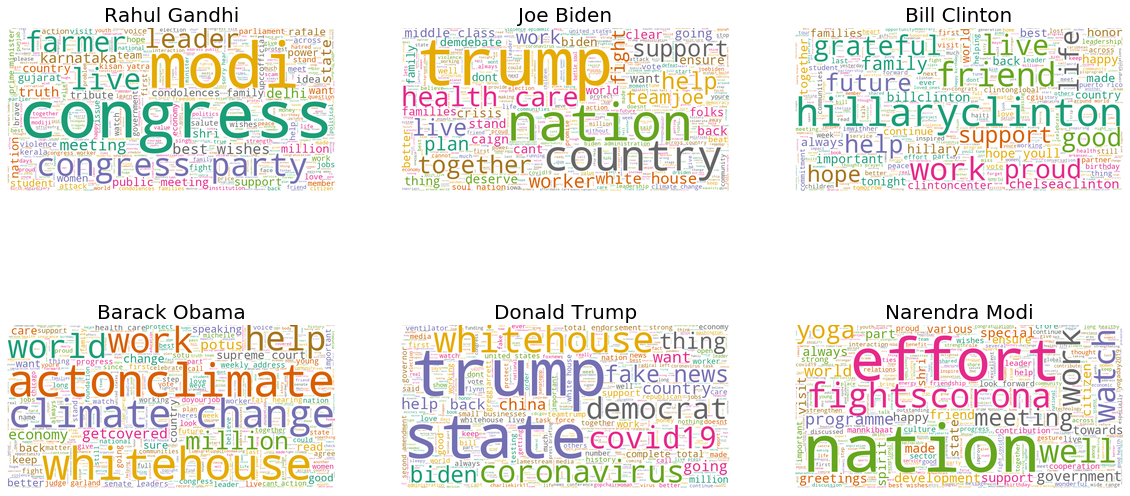

In [101]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt
import seaborn as sns

wc = WordCloud(stopwords = stopwords.words('english'), background_color = 'white', colormap = "Dark2", 
              max_font_size = 200, random_state = 40, max_words = 600, min_word_length = 4,
              min_font_size = 5, width = 1000, height = 500)


plt.rcParams['figure.figsize'] = [20,10]

Politicians = ["Rahul Gandhi", "Joe Biden", "Bill Clinton", "Barack Obama", "Donald Trump", "Narendra Modi"]

for index, name in enumerate(consolidated_df['Name']):
    wc.generate(consolidated_df['Tweets'][index])
    
    plt.subplot(2,3, index+1)
    plt.imshow(wc, interpolation = 'spline36')
    plt.axis('off')
    plt.title(Politicians[index], fontsize = 20)

plt.show()

In [45]:
from textblob import TextBlob

consolidated_df['Sentiment'] = consolidated_df['Tweets'].apply(lambda x: TextBlob(x).sentiment.polarity)
consolidated_df['Subjectivity'] = consolidated_df['Tweets'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

In [46]:
consolidated_df.head()

,Name,Tweets,Tokenized_tweets,Sentiment,Subjectivity
0,RahulGandhi,the chinese have walked in and n our territory in ladakh meanwhile the pm is absolutely silent and has vanished from the scene the millions of my ...,"[chinese, walked, territory, ladakh, meanwhile, absolutely, silent, vanished, scene, million, sister, brother, ajay, share, pain, thing, protect, ...",0.115893,0.501490
1,JoeBiden,there is systemic racism not in our law enforcement but in housing education and thing we do and we have to do the hard work to end it have to ...,"[systemic, racism, law, enforcement, housing, education, thing, hard, work, end, era, action, starting, real, police, reform, excuse, delay, add, ...",0.096127,0.462211
2,BillClinton,no one deserves to die the way george floyd did and the truth is if youre white in the chances are you wont that truth is what underlies the pain...,"[one, deserves, die, way, george, floyd, truth, youre, white, chance, wont, truth, underlies, pain, anger, feeling, expressing, full, statement, d...",0.260255,0.526989
3,BarackObama,its too early to tell if its permanent but the changes brought on by covid19 are forcing of us to reflect on what really matters in our lives joe...,"[early, tell, permanent, change, brought, covid, forcing, reflect, really, matter, life, joebiden, grief, heavy, burden, bear, harder, eye, world,...",0.203046,0.485867
4,DonaldTrump,domestic terrorists have n over seattle run by radical left democrats of course law orderrt marshablackburn decades of failed engagement western ...,"[domestic, terrorist, seattle, run, radical, left, democrat, course, law, orderrt, marshablackburn, decade, failed, engagement, western, investmen...",0.072396,0.503160


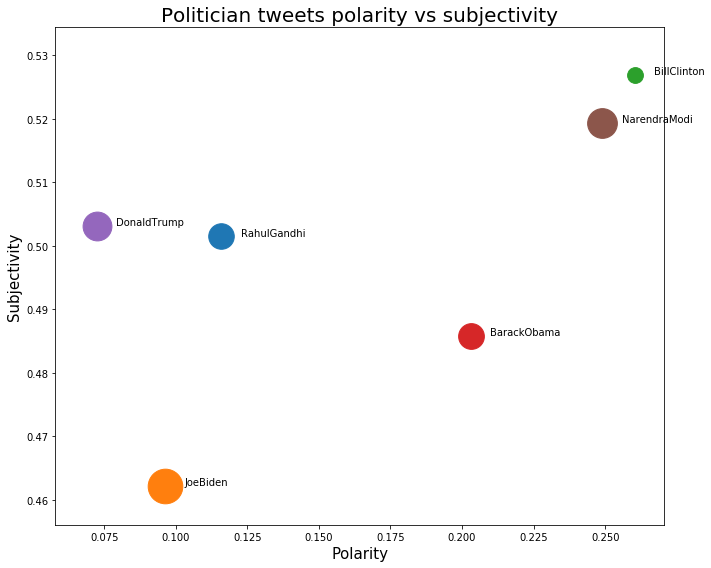

In [47]:

import numpy as np

plt.rcParams['figure.figsize'] = [10,8]


for i in range(len(consolidated_df)):
    
    color = np.random.rand(1)
    sizes = len(consolidated_df.loc[i,'Tokenized_tweets'])/40
    plt.scatter(x = consolidated_df.loc[i,'Sentiment'], y = consolidated_df.loc[i, 'Subjectivity'], s = sizes)
    
    
for i, txt in enumerate(consolidated_df['Name']):
    plt.annotate(txt, xy = (consolidated_df['Sentiment'][i],
                            consolidated_df['Subjectivity'][i]),
                 xytext=(consolidated_df['Sentiment'][i] + 0.0068,consolidated_df['Subjectivity'][i] + 0.0001))

    
plt.title("Politician tweets polarity vs subjectivity", fontsize = 20)
plt.xlabel("Polarity", fontsize = 15)
plt.ylabel("Subjectivity", fontsize = 15)
#plt.xlim(0,1)
#plt.ylim(0,1)

plt.tight_layout()

**Note that the size of the dots represents number of tweets considered for each politician. Bigger size means large number of tweets and vice-versa.**

#### My Findings
* Even though the polarity difference is not much diverse, there is a good difference among the politicians tweets.
* Joebiden tweets are mostly less subjective, they are more facts.
* Donald Trump tweets have more negative sentiments than other politicians mentioned. He tends to provide more subjective opinion informations than his rival(Joe Biden) running for president this year.
* Look at the two dots one for Narendra Modi and another one Bill Clinton - They posts far more positive tweets than the rest of the politician mentioned. We can also say they are an opinioned person(Both stays togther)
* Barack Obama's tweets stand in the middle of all the politician shown here.
* Also we can that the Rahul Gandhi's tweets polarity and subjectiveness are much closer to the trump's tweets. They show some same identical information.

In [48]:
working_df.head(2)

,RahulGandhi,JoeBiden,BillClinton,BarackObama,DonaldTrump,NarendraModi
0,"[2020-06-10 03:39:04, The Chinese have walked in and taken our territory in Ladakh.\n\nMeanwhile\n\nThe PM is absolutely silent and has vanished f...","[2020-06-11 01:15:00, There is systemic racism not just in our law enforcement but also in housing, education, and everything we do — and we have ...","[2020-05-31 00:01:39, No one deserves to die the way George Floyd did. And the truth is, if you’re white in America, the chances are you won’t. Th...","[2020-06-10 15:10:15, It’s too early to tell if it’s permanent, but the changes brought on by COVID-19 are forcing many of us to reflect on what r...","[2020-06-11 03:38:11, Domestic Terrorists have taken over Seattle, run by Radical Left Democrats, of course. LAW &amp; ORDER!]","[2020-06-11 05:40:35, Addressing the Indian Chamber of Commerce. Watch. https://t.co/5vc5Vtg7E2]"
1,"[2020-06-09 07:46:56, For the millions of my sisters and brothers like Ajay, we share your pain. We will do everything to protect you. \n\nWe will...","[2020-06-11 00:15:00, We have to make this an era of action — starting with real police reform. No more excuses. No more delays.\n \nAdd your name...","[2020-05-25 16:53:18, Today, and every day, we remember the brave men and women who sacrificed so much for their fellow Americans. Your country is...","[2020-06-09 23:30:04, RT @JoeBiden: Grief is a heavy burden to bear — and it's even harder with the eyes of the world watching. I know. But that b...","[2020-06-11 03:30:48, RT @MarshaBlackburn: Decades of failed engagement, Western investment and unfair trade tactics built China into an industria...","[2020-06-10 15:28:17, Had an excellent conversation with my friend PM @netanyahu about how India-Israel can collaborate in the post-COVID world. A..."


In [49]:

col = working_df.columns.tolist()
sentiment_dict = {"RahulGandhi":[], "JoeBiden":[], "BillClinton":[], "BarackObama":[], "DonaldTrump":[], "NarendraModi":[]}
for c in col:
    #blank_list = [[] for _ in range(len(working_df[working_df[col].notnull()].loc[0:,col]))]
    
    for i in range(len(working_df[working_df[c].notnull()].loc[0:,c])):
        #blank_list.extend(working_df[working_df[col].notnull()].loc[i,col][-1])
        sentiment_dict[c].append(TextBlob(working_df[working_df[c].notnull()].loc[i,c][-1]).sentiment.polarity)


In [50]:
sentiment_df = pd.DataFrame(sentiment_dict.values()).T
sentiment_df.columns = working_df.columns.tolist()
sentiment_df.head()

,RahulGandhi,JoeBiden,BillClinton,BarackObama,DonaldTrump,NarendraModi
0,0.000000,-0.291667,0.037500,0.266667,0.000000,0.000000
1,0.000000,0.040816,0.500000,-0.366667,-0.333333,1.000000
2,0.000000,0.500000,0.576667,-0.150000,-0.650000,0.100000
3,-0.600000,0.080000,0.112500,0.139286,0.091667,0.090152
4,0.089286,0.116667,0.000000,-0.100000,-0.145833,0.955000


In [51]:
sentiment_df

,RahulGandhi,JoeBiden,BillClinton,BarackObama,DonaldTrump,NarendraModi
0,0.000000,-0.291667,0.037500,0.266667,0.000000,0.000000
1,0.000000,0.040816,0.500000,-0.366667,-0.333333,1.000000
2,0.000000,0.500000,0.576667,-0.150000,-0.650000,0.100000
3,-0.600000,0.080000,0.112500,0.139286,0.091667,0.090152
4,0.089286,0.116667,0.000000,-0.100000,-0.145833,0.955000
...,...,...,...,...,...,...
3242,NaN,0.116667,NaN,NaN,NaN,NaN
3243,NaN,0.100000,NaN,NaN,NaN,NaN
3244,NaN,0.227273,NaN,NaN,NaN,NaN
3245,NaN,0.250000,NaN,NaN,NaN,NaN


In [52]:
sentiment_df = sentiment_df.fillna(0)

In [53]:
sentiment_df.isnull().any()

RahulGandhi     False
JoeBiden        False
BillClinton     False
BarackObama     False
DonaldTrump     False
NarendraModi    False
dtype: bool

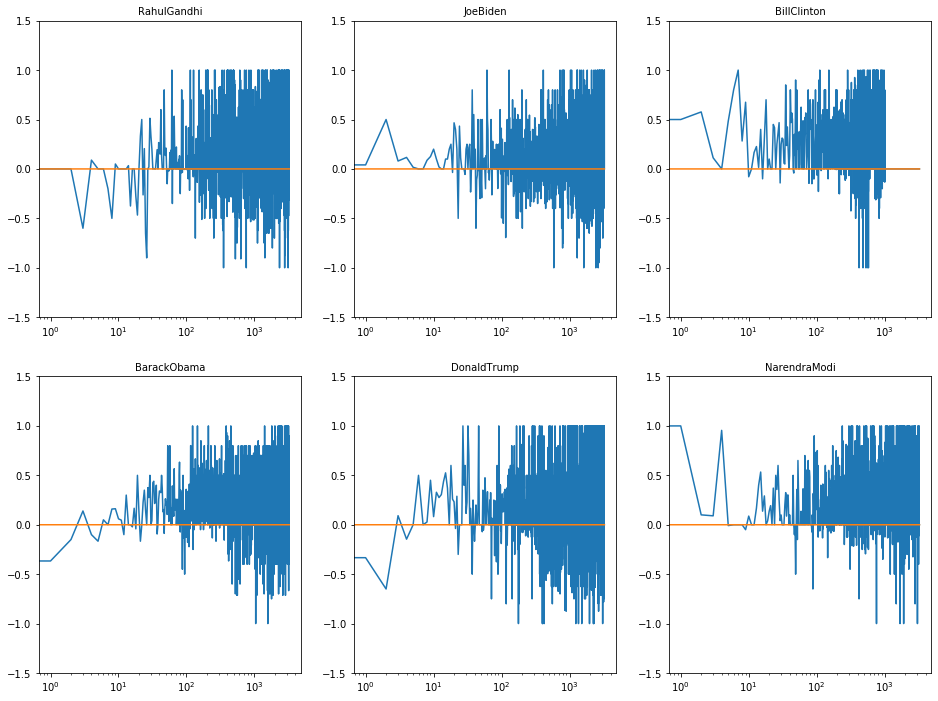

In [54]:

plt.rcParams['figure.figsize'] = [16, 12]

for index, col in enumerate(sentiment_df.columns):
    plt.subplot(2,3, index+1)
    plt.plot(sentiment_df[col])
    plt.plot(np.arange(0,len(sentiment_df[col])), np.zeros(len(sentiment_df[col])))
    plt.ylim(-1.5,1.5)
    plt.xscale('log')
    plt.title(col, fontsize = 10)
plt.show()

In [55]:

import math

col = working_df.columns.tolist()
sentiment_dict_over_time = {"RahulGandhi":[], "JoeBiden":[], "BillClinton":[], "BarackObama":[], "DonaldTrump":[], "NarendraModi":[]}


for c in col:
    size = math.floor(len(working_df[working_df[c].notnull()].loc[0:,c])/100)
    start = np.arange(0, len(working_df[working_df[c].notnull()].loc[0:,c]), size)
    for i in range(100):
        sentiment_dict_over_time[c].append(TextBlob(str(working_df[working_df[c].notnull()].loc[start[i]:start[i]+size,c])).sentiment.polarity)


sentiment_scale_over_time = pd.DataFrame(sentiment_dict_over_time.values()).T
sentiment_scale_over_time.columns = ["RahulGandhi", "JoeBiden", "BillClinton", "BarackObama", "DonaldTrump", "NarendraModi"]

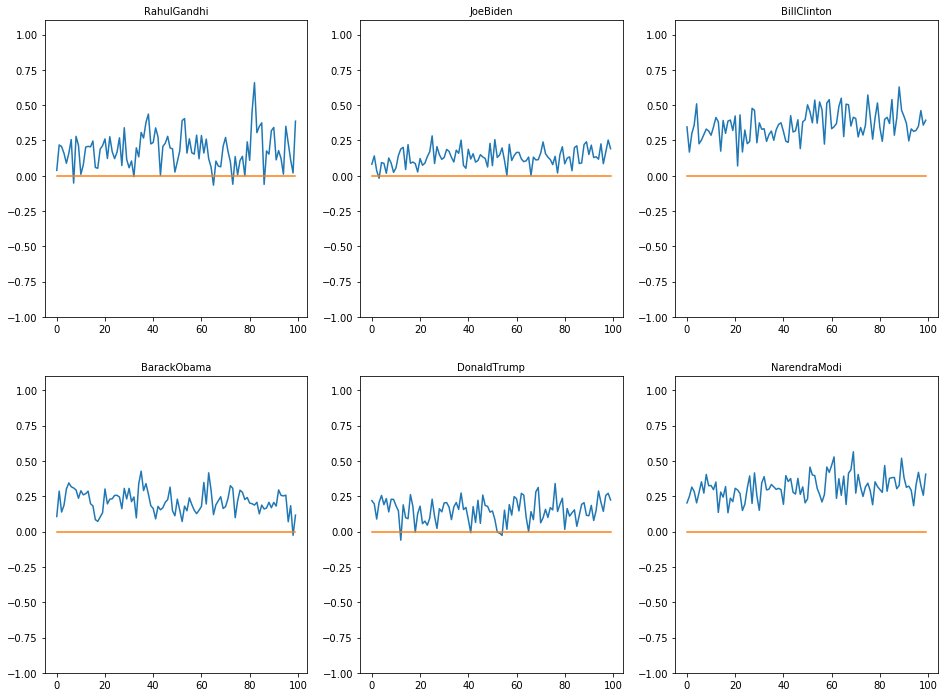

In [56]:

plt.rcParams['figure.figsize'] = [16, 12]

for index, col in enumerate(sentiment_scale_over_time.columns):
    plt.subplot(2,3, index+1)
    plt.plot(sentiment_scale_over_time[col])
    plt.plot(np.arange(0,100), np.zeros(100))
    plt.ylim(-1,1.1)
    plt.title(col, fontsize = 10)
plt.show()

## Cosine Similarity

In [57]:
# Recreating tfidf-vectorizer

from sklearn.feature_extraction.text import TfidfVectorizer
import time


start = time.time()

tfidf_recreate = TfidfVectorizer(analyzer = clean_text_round2)

tfidf_recreate_transformed = tfidf_recreate.fit_transform(consolidated_df['Tweets'])

print('Seconds elapsed: {}'.format(time.time() - start))

Seconds elapsed: 477.9292252063751


In [58]:
print((tfidf_recreate_transformed * tfidf_recreate_transformed.T).toarray())

[[1.         0.33764629 0.33465145 0.30842393 0.28593891 0.43600917]
 [0.33764629 1.         0.47067937 0.54553754 0.53375314 0.35511883]
 [0.33465145 0.47067937 1.         0.42806112 0.3348499  0.39256082]
 [0.30842393 0.54553754 0.42806112 1.         0.45081377 0.32983117]
 [0.28593891 0.53375314 0.3348499  0.45081377 1.         0.29518382]
 [0.43600917 0.35511883 0.39256082 0.32983117 0.29518382 1.        ]]


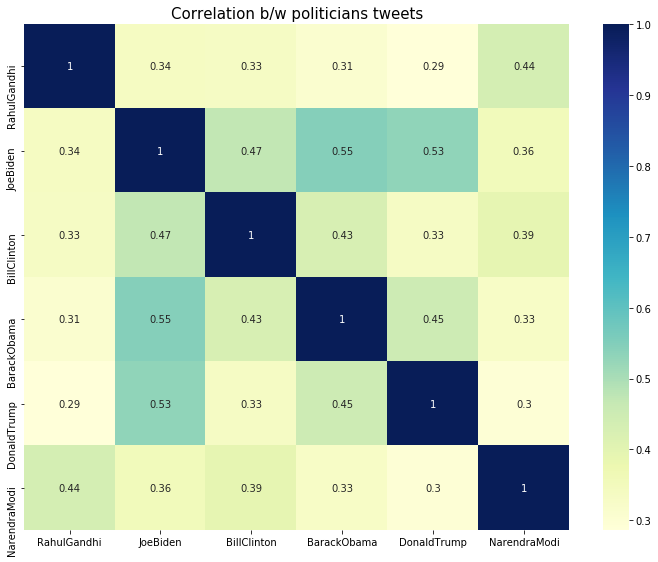

In [59]:

import seaborn as sns

import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))

sns.heatmap((tfidf_recreate_transformed * tfidf_recreate_transformed.T).toarray(), annot = True,cmap="YlGnBu",
            xticklabels=["RahulGandhi", "JoeBiden", "BillClinton", "BarackObama", "DonaldTrump", "NarendraModi"],
           yticklabels=["RahulGandhi", "JoeBiden", "BillClinton", "BarackObama", "DonaldTrump", "NarendraModi"])
plt.title("Correlation b/w politicians tweets", fontsize = 15)
plt.tight_layout()

#### My Findings

* As suspected Joe Biden and Barack Obama tweets have higher correlation than any other because Obama promotes Biden for running presidential election and he stayed as a vice-president when Obama was a president.
* And as thought next higher correalation is trump's tweets as he is a rival for Joe Biden.
* Also suspected there will be less correaltion b/w US president/ex-president tweets and Indian PM and oppostion tweets. 

## Topic Modelling

In [60]:
import pprint, string
import random
import pyLDAvis
import pyLDAvis.gensim
import gensim
import gensim.corpora as corpora
import warnings
warnings.filterwarnings('ignore')

from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from nltk import pos_tag

C:\Users\pearl\AppData\Local\Continuum\anaconda3\lib\site-packages\botocore\vendored\requests\packages\urllib3\_collections.py:1: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, MutableMapping
C:\Users\pearl\AppData\Local\Continuum\anaconda3\lib\site-packages\botocore\vendored\requests\packages\urllib3\_collections.py:1: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, MutableMapping
C:\Users\pearl\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [61]:
consolidated_df.head()

,Name,Tweets,Tokenized_tweets,Sentiment,Subjectivity
0,RahulGandhi,the chinese have walked in and n our territory in ladakh meanwhile the pm is absolutely silent and has vanished from the scene the millions of my ...,"[chinese, walked, territory, ladakh, meanwhile, absolutely, silent, vanished, scene, million, sister, brother, ajay, share, pain, thing, protect, ...",0.115893,0.501490
1,JoeBiden,there is systemic racism not in our law enforcement but in housing education and thing we do and we have to do the hard work to end it have to ...,"[systemic, racism, law, enforcement, housing, education, thing, hard, work, end, era, action, starting, real, police, reform, excuse, delay, add, ...",0.096127,0.462211
2,BillClinton,no one deserves to die the way george floyd did and the truth is if youre white in the chances are you wont that truth is what underlies the pain...,"[one, deserves, die, way, george, floyd, truth, youre, white, chance, wont, truth, underlies, pain, anger, feeling, expressing, full, statement, d...",0.260255,0.526989
3,BarackObama,its too early to tell if its permanent but the changes brought on by covid19 are forcing of us to reflect on what really matters in our lives joe...,"[early, tell, permanent, change, brought, covid, forcing, reflect, really, matter, life, joebiden, grief, heavy, burden, bear, harder, eye, world,...",0.203046,0.485867
4,DonaldTrump,domestic terrorists have n over seattle run by radical left democrats of course law orderrt marshablackburn decades of failed engagement western ...,"[domestic, terrorist, seattle, run, radical, left, democrat, course, law, orderrt, marshablackburn, decade, failed, engagement, western, investmen...",0.072396,0.503160


In [102]:



postags = ['NN', 'NNP', 'NNS', 'JJ', 'VBZ', 'NNPS', 'VBP','VBG']

pos_texts = []

refined_texts = [[] for _ in range(len(consolidated_df['Name']))]

for i,tweets in enumerate(consolidated_df['Tokenized_tweets']):
    refined_texts[i] = [word for word,pos in pos_tag(tweets) if pos in postags and len(word) > 3]

In [103]:
refined_texts[5]

['addressing',
 'chamber',
 'commerce',
 'watch',
 'excellent',
 'conversation',
 'friend',
 'israel',
 'collaborate',
 'postcovid',
 'world',
 'assuming',
 'prime',
 'ministerial',
 'office',
 'record',
 'israel',
 'partnership',
 'grow',
 'covid',
 'pandemic',
 'prime',
 'minister',
 'share',
 'deep',
 'cultural',
 'historical',
 'link',
 'cambodia',
 'important',
 'partner',
 'neighbourhood',
 'commitment',
 'strengthening',
 'relationship',
 'cambodia',
 'last',
 'several',
 'lion',
 'population',
 'rising',
 'community',
 'participation',
 'emphasis',
 'technology',
 'wildlife',
 'healthcare',
 'habitat',
 'management',
 'step',
 'humanlion',
 'conflict',
 'hope',
 'positive',
 'trend',
 'continuestwo',
 'good',
 'news',
 'population',
 'majestic',
 'asiatic',
 'lion',
 'living',
 'gujarat',
 'distribution',
 'area',
 'kudos',
 'gujarat',
 'effort',
 'excellent',
 'feat',
 'addition',
 'redevelopment',
 'kedarnath',
 'heritage',
 'centre',
 'ramban',
 'kedarnath',
 'development',


In [104]:
id2word = corpora.Dictionary(refined_texts)
corpus = [id2word.doc2bow(text) for text in refined_texts]

print(corpus)

[[(0, 4), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 2), (14, 4), (15, 1), (16, 2), (17, 3), (18, 2), (19, 2), (20, 1), (21, 1), (22, 2), (23, 3), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 3), (30, 2), (31, 1), (32, 19), (33, 1), (34, 1), (35, 1), (36, 4), (37, 1), (38, 5), (39, 1), (40, 1), (41, 3), (42, 1), (43, 1), (44, 1), (45, 16), (46, 1), (47, 1), (48, 3), (49, 1), (50, 3), (51, 1), (52, 1), (53, 4), (54, 35), (55, 1), (56, 1), (57, 8), (58, 1), (59, 2), (60, 1), (61, 1), (62, 40), (63, 18), (64, 3), (65, 1), (66, 1), (67, 6), (68, 3), (69, 1), (70, 4), (71, 2), (72, 1), (73, 3), (74, 1), (75, 3), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 3), (82, 1), (83, 2), (84, 2), (85, 4), (86, 1), (87, 19), (88, 2), (89, 1), (90, 1), (91, 3), (92, 1), (93, 3), (94, 8), (95, 1), (96, 1), (97, 2), (98, 5), (99, 1), (100, 1), (101, 1), (102, 2), (103, 3), (104, 1), (105, 1), (106, 2), (107, 4), (108, 1), (109, 1), (1

In [105]:
def coherence_calculation(dictionary, corpus, texts, alpha_range, num_topics_range):
    
    coherence_values = []
    model_list = []
    for alpha in alpha_range:
        for num_topics in num_topics_range:
            lda_model = gensim.models.ldamodel.LdaModel(corpus = corpus, id2word = dictionary, num_topics = num_topics,
                                                      alpha = alpha, per_word_topics = True)
            model_list.append(lda_model)
            coherence_model = CoherenceModel(model = lda_model, texts = texts, corpus = corpus, dictionary = dictionary, 
                                            coherence = 'c_v')
            coherence_values.append((alpha, num_topics, coherence_model.get_coherence()))
            
    return model_list, coherence_values
            

In [106]:
num_topics_range = [3, 5, 7, 9, 11, 13, 15]
alpha_range = [0.01, 0.1, 1]

model_list, coherence_values = coherence_calculation(dictionary = id2word, corpus = corpus, texts = refined_texts,
                                                    num_topics_range = num_topics_range, alpha_range = alpha_range)

coherence_df = pd.DataFrame(coherence_values, columns = ['alpha', 'num_topics', 'coherence_value'])

coherence_df

,alpha,num_topics,coherence_value
0,0.01,3,0.271363
1,0.01,5,0.257191
2,0.01,7,0.273448
3,0.01,9,0.269448
4,0.01,11,0.269251
5,0.01,13,0.271714
6,0.01,15,0.266032
7,0.10,3,0.267118
8,0.10,5,0.263038
9,0.10,7,0.264594


In [107]:
coherence_df.to_pickle("coherence_df.pkl")

In [108]:
def plot_coherence(coherence_df, alpha_range, num_topics_range):
    plt.figure(figsize=(16,6))
    plt.grid('darkgrid')
    for i, val in enumerate(alpha_range):
        
        plt.subplot(1,3, i+1)
        alpha_subset = coherence_df[coherence_df['alpha'] == val]
        plt.plot(alpha_subset['num_topics'], alpha_subset['coherence_value'])
        plt.xlabel('num_topics')
        plt.ylabel('Coherence Value')
        plt.title("alpha={0}".format(val))
        plt.ylim([0.10, 0.5])
        plt.legend('coherence value', loc='upper left')
        plt.xticks(num_topics_range)
        plt.tight_layout()

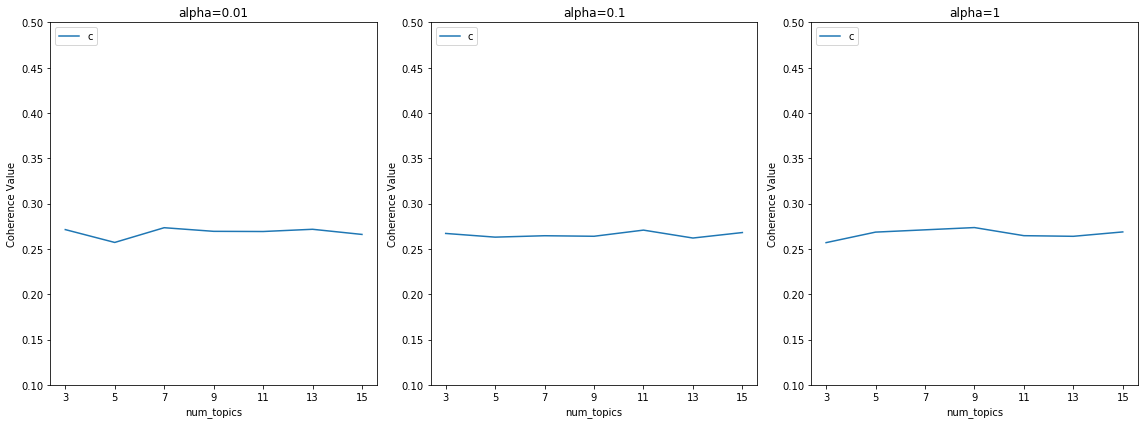

In [109]:
plot_coherence(coherence_df, alpha_range, num_topics_range)

In [128]:
lda_model = gensim.models.ldamodel.LdaModel(corpus = corpus, id2word = id2word, num_topics = 4, random_state = 40,
                                           alpha = 1, per_word_topics = True, minimum_probability = 0.005)

In [129]:
pprint.pprint(lda_model.print_topics())

[(0,
  '0.005*"country" + 0.004*"care" + 0.004*"state" + 0.004*"work" + '
  '0.004*"family" + 0.004*"nation" + 0.004*"life" + 0.003*"health" + '
  '0.003*"congress" + 0.003*"help"'),
 (1,
  '0.005*"family" + 0.005*"country" + 0.005*"nation" + 0.005*"work" + '
  '0.004*"life" + 0.004*"world" + 0.004*"health" + 0.004*"care" + 0.003*"good" '
  '+ 0.003*"trump"'),
 (2,
  '0.005*"family" + 0.005*"work" + 0.004*"nation" + 0.004*"life" + '
  '0.004*"care" + 0.004*"country" + 0.003*"covid" + 0.003*"state" + '
  '0.003*"world" + 0.003*"health"'),
 (3,
  '0.007*"trump" + 0.005*"nation" + 0.005*"country" + 0.005*"health" + '
  '0.005*"life" + 0.004*"work" + 0.004*"family" + 0.004*"care" + 0.004*"state" '
  '+ 0.004*"help"')]


In [130]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.007495  0.000767       1        1  45.075832
1     -0.002425  0.002611       2        1  25.143675
2     -0.004200  0.000709       3        1  18.370872
0     -0.000870 -0.004087       4        1  11.409616, topic_info=         Term        Freq       Total Category  logprob  loglift
778      care  516.000000  516.000000  Default  30.0000  30.0000
1169  country  625.000000  625.000000  Default  29.0000  29.0000
1845   family  580.000000  580.000000  Default  28.0000  28.0000
2007   friend  275.000000  275.000000  Default  27.0000  27.0000
5129    state  480.000000  480.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
844    change   35.489597  347.545959   Topic4  -6.0794  -0.1109
3990     plan   32.191952  278.792145   Topic4  -6.1769   0.0120
6007    world   39.813332  478.599823   Topic4  -5.9644  -0.3159
5917    watch   34.931389  362.184265   Topic4  -6.0952  -0.1681
5270  support   33.560398  376.148621   Topic4  -6.1353  -0.2459

[368 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
16980      1  0.363494  abeshinzo
16980      2  0.363494  abeshinzo
16980      3  0.363494  abeshinzo
16980      4  0.181747  abeshinzo
54         1  0.473159     action
...      ...       ...        ...
6055       4  0.111400      youll
6056       1  0.433110      young
6056       2  0.242542      young
6056       3  0.173244      young
6056       4  0.150145      young

[996 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 3, 1])

In [73]:
working_df.head(2)

,RahulGandhi,JoeBiden,BillClinton,BarackObama,DonaldTrump,NarendraModi
0,"[2020-06-10 03:39:04, The Chinese have walked in and taken our territory in Ladakh.\n\nMeanwhile\n\nThe PM is absolutely silent and has vanished f...","[2020-06-11 01:15:00, There is systemic racism not just in our law enforcement but also in housing, education, and everything we do — and we have ...","[2020-05-31 00:01:39, No one deserves to die the way George Floyd did. And the truth is, if you’re white in America, the chances are you won’t. Th...","[2020-06-10 15:10:15, It’s too early to tell if it’s permanent, but the changes brought on by COVID-19 are forcing many of us to reflect on what r...","[2020-06-11 03:38:11, Domestic Terrorists have taken over Seattle, run by Radical Left Democrats, of course. LAW &amp; ORDER!]","[2020-06-11 05:40:35, Addressing the Indian Chamber of Commerce. Watch. https://t.co/5vc5Vtg7E2]"
1,"[2020-06-09 07:46:56, For the millions of my sisters and brothers like Ajay, we share your pain. We will do everything to protect you. \n\nWe will...","[2020-06-11 00:15:00, We have to make this an era of action — starting with real police reform. No more excuses. No more delays.\n \nAdd your name...","[2020-05-25 16:53:18, Today, and every day, we remember the brave men and women who sacrificed so much for their fellow Americans. Your country is...","[2020-06-09 23:30:04, RT @JoeBiden: Grief is a heavy burden to bear — and it's even harder with the eyes of the world watching. I know. But that b...","[2020-06-11 03:30:48, RT @MarshaBlackburn: Decades of failed engagement, Western investment and unfair trade tactics built China into an industria...","[2020-06-10 15:28:17, Had an excellent conversation with my friend PM @netanyahu about how India-Israel can collaborate in the post-COVID world. A..."


In [76]:

col = working_df.columns.tolist()
senti_date_dict = {"RahulGandhi":[], "JoeBiden":[], "BillClinton":[], "BarackObama":[], "DonaldTrump":[], "NarendraModi":[]}
for c in col:
    #blank_list = [[] for _ in range(len(working_df[working_df[col].notnull()].loc[0:,col]))]
    
    for i in range(len(working_df[working_df[c].notnull()].loc[0:,c])):
        #blank_list.extend(working_df[working_df[col].notnull()].loc[i,col][-1])
        sentiment_dict[c].append(TextBlob(working_df[working_df[c].notnull()].loc[i,c][-1]).sentiment.polarity)


In [77]:
sentiment_df.head(2)

,RahulGandhi,JoeBiden,BillClinton,BarackObama,DonaldTrump,NarendraModi
0,0.0,-0.291667,0.0375,0.266667,0.000000,0.0
1,0.0,0.040816,0.5000,-0.366667,-0.333333,1.0


In [78]:
import datetime

def date_extract(df):
        
    temp_dict = {0: []}
    for i in range(len(df)):
        temp_dict[0].append(df.iloc[i,0][0].strftime('%B-%Y'))
        
    return temp_dict

In [79]:
df_rahul = pd.concat([sentiment_df['RahulGandhi'], pd.DataFrame(date_extract(pd.DataFrame(working_df[working_df['RahulGandhi'].notnull()].loc[0:,'RahulGandhi'])))], axis = 1)
df_rahul.columns = ['RahulGandhi', 'Date']
df_joe = pd.concat([sentiment_df['JoeBiden'], pd.DataFrame(date_extract(pd.DataFrame(working_df[working_df['JoeBiden'].notnull()].loc[0:,'JoeBiden'])))], axis = 1)
df_joe.columns = ['JoeBiden', 'Date']
df_bill = pd.concat([sentiment_df['BillClinton'], pd.DataFrame(date_extract(pd.DataFrame(working_df[working_df['BillClinton'].notnull()].loc[0:,'BillClinton'])))], axis = 1)
df_bill.columns = ['BillClinton', 'Date']
df_barack = pd.concat([sentiment_df['BarackObama'], pd.DataFrame(date_extract(pd.DataFrame(working_df[working_df['BarackObama'].notnull()].loc[0:,'BarackObama'])))], axis = 1)
df_barack.columns = ['BarackObama', 'Date']
df_donald = pd.concat([sentiment_df['DonaldTrump'], pd.DataFrame(date_extract(pd.DataFrame(working_df[working_df['DonaldTrump'].notnull()].loc[0:,'DonaldTrump'])))], axis = 1)
df_donald.columns = ['DonaldTrump', 'Date']
df_narendra = pd.concat([sentiment_df['NarendraModi'], pd.DataFrame(date_extract(pd.DataFrame(working_df[working_df['NarendraModi'].notnull()].loc[0:,'NarendraModi'])))], axis = 1)
df_narendra.columns = ['NarendraModi', 'Date']

In [80]:
df_rahul = df_rahul[df_rahul['Date'].notnull()]
df_joe = df_joe[df_joe['Date'].notnull()]
df_bill = df_bill[df_bill['Date'].notnull()]
df_barack = df_barack[df_barack['Date'].notnull()]
df_donald = df_donald[df_donald['Date'].notnull()]
df_narendra = df_narendra[df_narendra['Date'].notnull()]

In [81]:
df_rahul.tail()

,RahulGandhi,Date
3229,-0.125000,March-2016
3230,0.000000,March-2016
3231,-0.047619,March-2016
3232,0.000000,March-2016
3233,0.333333,March-2016


In [82]:
df_joe.tail()

,JoeBiden,Date
3242,0.116667,May-2019
3243,0.100000,May-2019
3244,0.227273,May-2019
3245,0.250000,May-2019
3246,0.000000,May-2019


In [83]:
df_bill.tail()

,BillClinton,Date
999,0.800000,April-2013
1000,0.625000,April-2013
1001,0.200000,April-2013
1002,-0.133333,April-2013
1003,0.362500,April-2013


In [84]:
df_barack.tail()

,BarackObama,Date
3203,0.90,November-2014
3204,0.00,November-2014
3205,0.25,November-2014
3206,0.00,November-2014
3207,0.00,November-2014


In [85]:
df_donald.tail()

,DonaldTrump,Date
3201,-0.364583,March-2020
3202,0.000000,March-2020
3203,0.050000,March-2020
3204,0.875000,March-2020
3205,-0.222159,March-2020


In [86]:
df_narendra.tail()

,NarendraModi,Date
3210,0.200000,May-2019
3211,0.458333,May-2019
3212,0.200000,May-2019
3213,0.100000,May-2019
3214,0.100000,May-2019


In [87]:
df_rahul['Year'] = df_rahul['Date'].apply(lambda x: x.split('-')[1])
df_joe['Year'] = df_joe['Date'].apply(lambda x: x.split('-')[1])
df_bill['Year'] = df_bill['Date'].apply(lambda x: x.split('-')[1])
df_barack['Year'] = df_barack['Date'].apply(lambda x: x.split('-')[1])
df_donald['Year'] = df_donald['Date'].apply(lambda x: x.split('-')[1])
df_narendra['Year'] = df_narendra['Date'].apply(lambda x: x.split('-')[1])

In [88]:
df_barack.tail()

,BarackObama,Date,Year
3203,0.90,November-2014,2014
3204,0.00,November-2014,2014
3205,0.25,November-2014,2014
3206,0.00,November-2014,2014
3207,0.00,November-2014,2014


In [89]:
barack_politics_sentiment_df = pd.concat([df_barack[df_barack['Year'] == '2014'], df_barack[df_barack['Year'] == '2015'],
                                         df_barack[df_barack['Year'] == '2018'], df_barack[df_barack['Year'] == '2019'],
                                          df_barack[df_barack['Year'] == '2020']], axis = 0, ignore_index = True)
joe_politics_sentiment_df = pd.concat([df_joe[df_joe['Year'] == '2018'], df_joe[df_joe['Year'] == '2019'], 
                                       df_joe[df_joe['Year'] == '2020']],axis = 0, ignore_index = True)
bill_politics_sentiment_df = pd.concat([df_bill[df_bill['Year'] == '2014'], df_bill[df_bill['Year'] == '2015']], axis = 0, ignore_index = True)
rahul_politics_sentiment_df = pd.concat([df_rahul[df_rahul['Year'] == '2018'], df_rahul[df_rahul['Year'] == '2019']], axis = 0, ignore_index = True)
donald_politics_sentiment_df = df_donald
narendra_politics_sentiment_df = df_narendra[df_narendra['Year'] == '2019']


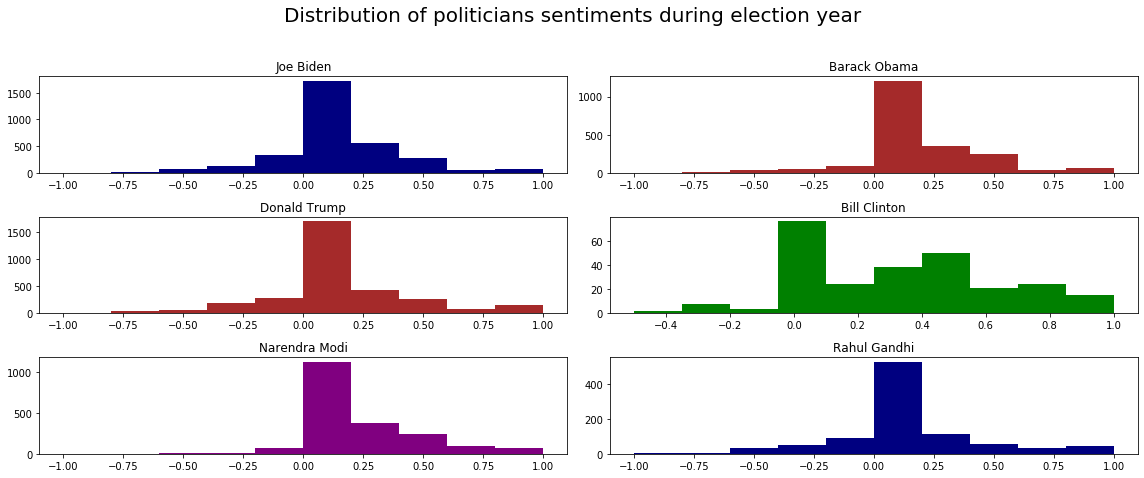

In [135]:
plt.rcParams['figure.figsize'] = [16, 6]
    
plt.subplot(3,2,1)
plt.title("Joe Biden")
plt.hist(x = joe_politics_sentiment_df['JoeBiden'], color = 'navy')
plt.subplot(3,2,2)
plt.title("Barack Obama")
plt.hist(x = barack_politics_sentiment_df['BarackObama'], color = 'brown')
plt.subplot(3,2,3)
plt.title("Donald Trump")
plt.hist(x = donald_politics_sentiment_df['DonaldTrump'], color = 'brown')
plt.subplot(3,2,4)
plt.title("Bill Clinton")
plt.hist(x = bill_politics_sentiment_df['BillClinton'], color = 'green')
plt.subplot(3,2,5)
plt.title("Narendra Modi")
plt.hist(x = narendra_politics_sentiment_df['NarendraModi'], color = 'purple')
plt.subplot(3,2,6)
plt.title("Rahul Gandhi")
plt.hist(x = rahul_politics_sentiment_df['RahulGandhi'], color = 'navy')


plt.suptitle("Distribution of politicians sentiments during election year",y = 1.1, fontsize = 20)
plt.tight_layout()
plt.show()

**Color coded as they depicts similar sentiments during election period.**

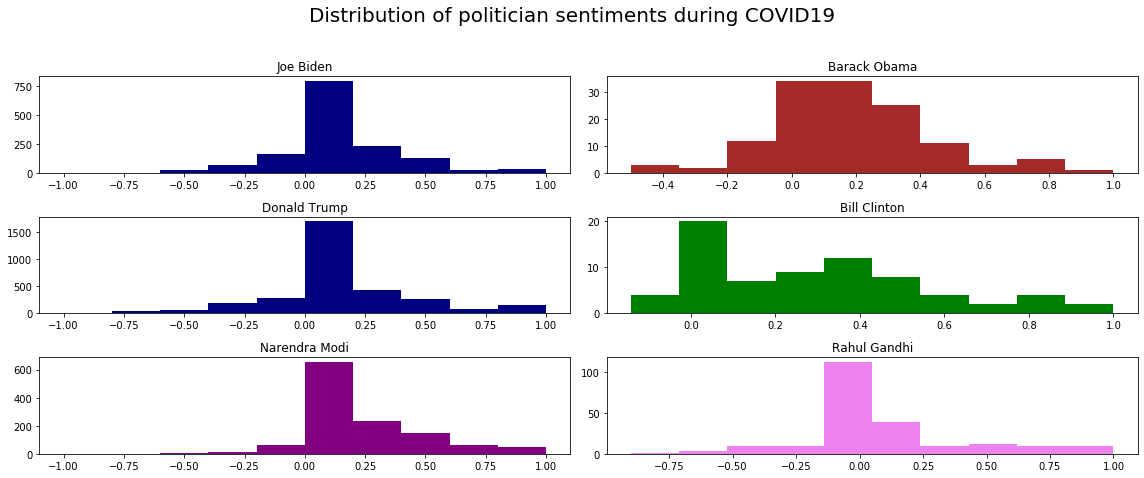

In [91]:
plt.rcParams['figure.figsize'] = [16, 6]
    
plt.subplot(3,2,1)
plt.title("Joe Biden")
plt.hist(x = df_joe[df_joe['Year'] == '2020'].iloc[0:,0], color = 'navy')
plt.subplot(3,2,2)
plt.title("Barack Obama")
plt.hist(x = df_barack[df_barack['Year'] == '2020'].iloc[0:,0], color = 'brown')
plt.subplot(3,2,3)
plt.title("Donald Trump")
plt.hist(x = df_donald[df_donald['Year'] == '2020'].iloc[0:,0], color = 'navy')
plt.subplot(3,2,4)
plt.title("Bill Clinton")
plt.hist(x = df_bill[df_bill['Year'] == '2020'].iloc[0:,0], color = 'green')
plt.subplot(3,2,5)
plt.title("Narendra Modi")
plt.hist(x = df_narendra[df_narendra['Year'] == '2020'].iloc[0:,0], color = 'purple')
plt.subplot(3,2,6)
plt.title("Rahul Gandhi")
plt.hist(x = df_rahul[df_rahul['Year'] == '2020'].iloc[0:,0], color = 'violet')


plt.suptitle("Distribution of politicians sentiments during COVID19",y = 1.1, fontsize = 20)
plt.tight_layout()
plt.show()

**Color coded as they depicts similar sentiments during COVID19.**